<a href="https://colab.research.google.com/github/SRINIRAGZ/CNN_Digitrecognition/blob/main/CNN_ImageClassification_handwrittendigits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#optuna for hyperparameter tuning
!pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 395.9/395.9 kB 24.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.7/242.7 kB 23.6 MB/s eta 0:00:00


In [5]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import optuna

In [6]:
(x_train, y_train) , (x_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [7]:
def show_image(image, label):
    plt.figure(figsize=[25,2])
    plt.imshow(image)
    plt.grid(False)
    plt.xlabel(label)
    plt.show()

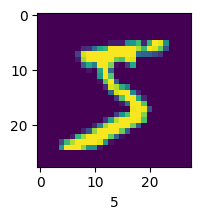

In [8]:
show_image(x_train[0],y_train[0])

In [9]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  30,  36,  94, 154, 170,
        253, 253, 253, 253, 253, 225, 172, 253, 242, 195,  64,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  49, 238, 253, 253, 253, 253,
        253, 253, 253, 253, 251,  93,  82,  82,  56,  39,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,  18, 219, 253, 253, 253, 253,
        253, 198, 182, 247, 241,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  80, 156, 107, 253, 253,
        205,  11,   0,  43, 154,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
         90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 139, 253,
        190,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  11, 190,
        253,  70,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  35,
        241, 225, 160, 108,   1,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         81, 240, 253, 253, 119,  25,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  45, 186, 253, 253, 150,  27,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  16,  93, 252, 253, 187,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0, 249, 253, 249,  64,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  46, 130, 183, 253, 253, 207,   2,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  39,
        148, 229, 253, 253, 253, 250, 182,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 114, 221,
        253, 253, 253, 253, 201,  78,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,  23,  66, 213, 253, 253,
        253, 253, 198,  81,   2,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,  18, 171, 219, 253, 253, 253, 253,
        195,  80,   9,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,  55, 172, 226, 253, 253, 253, 253, 244, 133,
         11,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0, 136, 253, 25

In [10]:
x_train.shape

(60000, 28, 28)

In [11]:
x_test.shape

(10000, 28, 28)

In [12]:
y_train.shape

(60000,)

In [13]:
y_train[:2]

array([5, 0], dtype=uint8)

In [14]:
num_obs_train = x_train.shape[0]
num_obs_test = x_test.shape[0]
num_row = x_train.shape[1]
num_col = x_train.shape[2]
x_train_scaling = x_train.reshape(num_obs_train,num_row*num_col)
x_test_scaling = x_test.reshape(num_obs_test,num_row*num_col)

In [15]:
scaler = sk.preprocessing.MinMaxScaler()
# scaler.fit(x_train_scaling)
x_train = scaler.fit_transform(x_train_scaling).reshape(num_obs_train, num_row, num_col,1)
x_test = scaler.transform(x_test_scaling).reshape(num_obs_test, num_row, num_col,1)


In [16]:
x_train.shape

(60000, 28, 28, 1)

Build a CNN


In [ ]:
def create_model(trial):
  # variables
  filter1 = trial.suggest_int("filter_conv1", 3, 7)
  filter2 = trial.suggest_int("filter_conv2", 3, 5)
  # kernel size
  ks1 = trial.suggest_int("kernel1", 2, 4)
  ks2 = trial.suggest_int("kernel2", 2, 3)
  # stride
  s1 = trial.suggest_int("stride1", 1, 2)
  s2 = trial.suggest_int("stride2", 1, 2)
  #pool size
  p1 = trial.suggest_int("pool1", 2, 3)
  p2 = trial.suggest_int("pool2", 2, 3)
  sp1 = trial.suggest_int("poolstride1", p1, p1)
  sp2 = trial.suggest_int("poolstride2", p2, p2)
  #n_layers
  n_layers = trial.suggest_int("n_layers", 1, 2)
  #model
  model = keras.Sequential(
      [ keras.layers.Conv2D(filters=filter1, kernel_size=(ks1,ks1), strides=(s1,s1), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPool2D(pool_size=p1, strides=sp1),
        keras.layers.Conv2D(filters=filter2, kernel_size=(ks2,ks2), strides=(s2,s2), activation='relu'),
        keras.layers.MaxPool2D(pool_size=p2, strides=sp2),
        keras.layers.Flatten(),
      ]
  )
  for n in range(n_layers):
    units = trial.suggest_int(f"units{n}", 7, 12)
    model.add(keras.layers.Dense(units=units, activation='relu'))
  #final
  model.add(keras.layers.Dense(units=10, activation='softmax'))
  model.compile( optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
  return model

def objective(trial):
    x_t,x_v,y_t,y_v= sk.model_selection.train_test_split(x_train,y_train, test_size=0.25, random_state=42)
    model = create_model(trial)
    model.fit(x_t, y_t,
              epochs=20,
              batch_size=32,
              verbose=0)

    preds = [ np.argmax(e) for e in model.predict(x_v) ]

    return sk.metrics.accuracy_score(y_v, preds)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=10)

# Best result
print("Best accuracy:", study.best_trial.value)
print("Best hyperparameters:", study.best_trial.params)


In [18]:
def create_final_model(params):
  # variables
  filter1 = params["filter_conv1"]
  filter2 = params["filter_conv2"]
  # kernel size
  ks1 = params["kernel1"]
  ks2 = params["kernel2"]
  # stride
  s1 = params["stride1"]
  s2 = params["stride2"]
  #pool size
  p1 = params["pool1"]
  p2 = params["pool2"]
  sp1 = params["poolstride1"]
  sp2 = params["poolstride2"]
  #n_layers
  n_layers = params["n_layers"]
  #model
  model = keras.Sequential(
      [ keras.layers.Conv2D(filters=filter1, kernel_size=(ks1,ks1), strides=(s1,s1), activation='relu', input_shape=(28,28,1)),
        keras.layers.MaxPool2D(pool_size=p1, strides=sp1),
        keras.layers.Conv2D(filters=filter2, kernel_size=(ks2,ks2), strides=(s2,s2), activation='relu'),
        keras.layers.MaxPool2D(pool_size=p2, strides=sp2),
        keras.layers.Flatten(),
      ]
  )
  for n in range(n_layers):
    units = params[f"units{n}"]
    model.add(keras.layers.Dense(units=units, activation='relu'))
  #final
  model.add(keras.layers.Dense(units=10, activation='softmax'))
  model.compile( optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
  return model

In [19]:
best_model = {"filter_conv1":5,
              "filter_conv2":5,
              "kernel1":3,
              "kernel2":3,
              "stride1":1,
              "stride2":1,
              "pool1":2,
              "pool2":2,
              "poolstride1":2,
              "poolstride2":2,
              "n_layers":1,
              "units0":10
              }
cnn = create_final_model(best_model)
cnn.fit(x_train, y_train, epochs=50, batch_size=50)
preds = [ np.argmax(e) for e in cnn.predict(x_test) ]
acc = sk.metrics.accuracy_score(y_test, preds)
print(sk.metrics.classification_report(y_test,preds))


Epoch 1/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.6181 - loss: 1.1783
Epoch 2/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8972 - loss: 0.3454
Epoch 3/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9308 - loss: 0.2359
Epoch 4/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9454 - loss: 0.1809
Epoch 5/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9554 - loss: 0.1473
Epoch 6/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9619 - loss: 0.1228
Epoch 7/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9659 - loss: 0.1103
Epoch 8/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9684 - loss: 0.1012
Epoch 9/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9691 - loss: 0.0981
Epoch 10/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9727 - loss: 0.0912
Epoch 11/50
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9722 - loss: 0.0866
Epoch 12/50
1200/1200 ━━━━━━━━

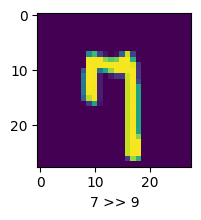

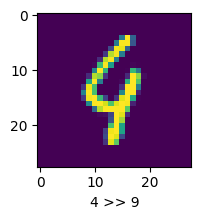

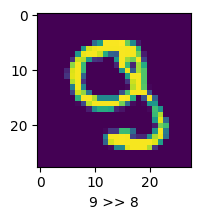

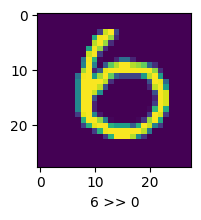

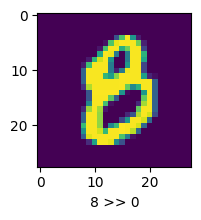

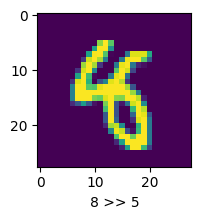

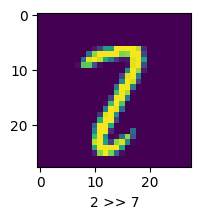

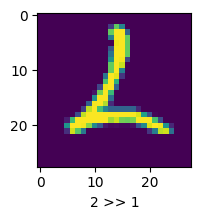

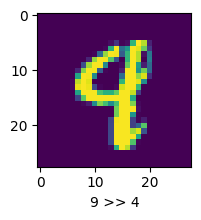

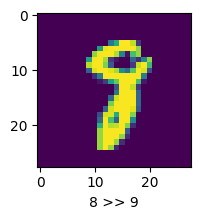

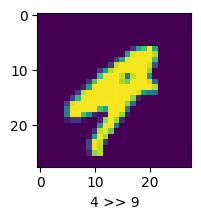

In [23]:
cnt=0
for i in range(x_test.shape[0]):
  if y_test[i] != preds[i]:
    if cnt<=10:
      show_image(x_test[i],f"{y_test[i]} >> {preds[i]}")
    cnt+=1



In [24]:
print(f'total {cnt} image classification mismatch')

total 205 image classification mismatch
